In [121]:
import pandas as pd
import numpy as np

In [122]:
data=pd.read_csv('Churn_Modelling.csv')

In [123]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
import sweetviz as sv

analysis=sv.analyze(data)
analysis.show_html('churn.html')

                                             |                                             | [  0%]   00:00 ->…

Report churn.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [124]:
data.drop("RowNumber",axis=1,inplace=True)
data.drop("CustomerId",axis=1,inplace=True)
data.drop("Surname",axis=1,inplace=True)

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [125]:
geo=pd.get_dummies(data["Geography"],drop_first=True)
geo

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [126]:
gender=pd.get_dummies(data["Gender"], drop_first=True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [127]:
data["Male"]=gender["Male"]
data["Germany"]=geo["Germany"]
data["Spain"]=geo["Spain"]

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [128]:
data.drop("Geography",axis=1,inplace=True)
data.drop("Gender",axis=1,inplace=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [129]:
data.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.002857,0.005538,0.004780
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.027544,0.046897,-0.001685
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.014733,-0.000567,0.003868
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.012087,0.401110,-0.134892
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.021859,-0.010419,0.009039
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.005766,0.010577,-0.013480
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.022544,-0.020486,0.016732
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.008112,0.010297,-0.006482
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.106512,0.173488,-0.052667
Male,-0.002857,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,1.000000,-0.024628,0.016889


<AxesSubplot:>

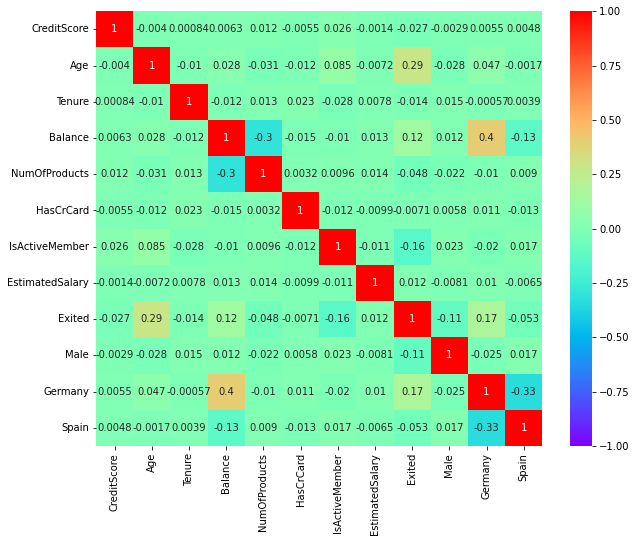

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap='rainbow',annot=True,vmin=-1,vmax=1)

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
y=data["Exited"]
data.drop("Exited",axis=1,inplace=True)
X=data

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [134]:
y_train.value_counts()

0    5584
1    1416
Name: Exited, dtype: int64

In [135]:
y_test.value_counts()

0    2379
1     621
Name: Exited, dtype: int64

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [138]:
y_pred=lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [139]:
(unique, counts) = np.unique(y_pred, return_counts=True)
unique,counts

(array([0, 1], dtype=int64), array([2901,   99], dtype=int64))

In [140]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

In [141]:
confusion_matrix(y_test, y_pred)

array([[2316,   63],
       [ 585,   36]], dtype=int64)

In [142]:
p=precision_score(y_test, y_pred)
r=recall_score(y_test, y_pred)
a=accuracy_score(y_test, y_pred)
f=f1_score(y_test,y_pred)

print("p is ", p )
print("r is ", r)
print("a is ", a)
print("f is ", f)

p is  0.36363636363636365
r is  0.057971014492753624
a is  0.784
f is  0.1


In [163]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [181]:
classifier= Sequential()

classifier.add(Dense(units = 32 , kernel_initializer ='he_normal', activation='relu', input_dim = 11))
classifier.add(Dense(units = 16 , kernel_initializer ='he_normal', activation='relu'))
# classifier.add(Dropout(0.4))
classifier.add(Dense(units = 32 , kernel_initializer ='he_normal', activation='relu'))

classifier.add(Dense(units = 1 , kernel_initializer ='glorot_uniform', activation='sigmoid'))


In [182]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_32 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_33 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 33        
Total params: 1,489
Trainable params: 1,489
Non-trainable params: 0
_________________________________________________________________


In [183]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [184]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_32 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_33 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 33        
Total params: 1,489
Trainable params: 1,489
Non-trainable params: 0
_________________________________________________________________


In [185]:
model_history=classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
469/469 [==============================] - 1s 1ms/step - loss: 1062.3972 - accuracy: 0.6934 - val_loss: 5.4445 - val_accuracy: 0.5353
Epoch 2/100
469/469 [==============================] - 0s 837us/step - loss: 0.6435 - accuracy: 0.7820 - val_loss: 0.5175 - val_accuracy: 0.7962
Epoch 3/100
469/469 [==============================] - 0s 847us/step - loss: 0.5105 - accuracy: 0.7947 - val_loss: 0.5073 - val_accuracy: 0.7962
Epoch 4/100
469/469 [==============================] - 0s 851us/step - loss: 0.5070 - accuracy: 0.7952 - val_loss: 0.5070 - val_accuracy: 0.7962
Epoch 5/100
469/469 [==============================] - 0s 855us/step - loss: 0.4996 - accuracy: 0.8004 - val_loss: 0.5068 - val_accuracy: 0.7962
Epoch 6/100
469/469 [==============================] - 0s 851us/step - loss: 0.4992 - accuracy: 0.8005 - val_loss: 0.5069 - val_accuracy: 0.7962
Epoch 7/100
469/469 [==============================] - 0s 842us/step - loss: 0.5011 - accuracy: 0.7996 - val_loss: 0.5065 - val_a

469/469 [==============================] - 0s 1ms/step - loss: 0.4928 - accuracy: 0.8057 - val_loss: 0.5058 - val_accuracy: 0.7962
Epoch 58/100
469/469 [==============================] - 0s 829us/step - loss: 0.4925 - accuracy: 0.8056 - val_loss: 0.5069 - val_accuracy: 0.7962
Epoch 59/100
469/469 [==============================] - 0s 847us/step - loss: 0.4897 - accuracy: 0.8089 - val_loss: 0.5057 - val_accuracy: 0.7962
Epoch 60/100
469/469 [==============================] - 0s 984us/step - loss: 0.4966 - accuracy: 0.8030 - val_loss: 0.5057 - val_accuracy: 0.7962
Epoch 61/100
469/469 [==============================] - 0s 976us/step - loss: 0.5029 - accuracy: 0.7984 - val_loss: 0.5058 - val_accuracy: 0.7962
Epoch 62/100
469/469 [==============================] - 0s 899us/step - loss: 0.5026 - accuracy: 0.7988 - val_loss: 0.5057 - val_accuracy: 0.7962
Epoch 63/100
469/469 [==============================] - 0s 858us/step - loss: 0.5070 - accuracy: 0.7955 - val_loss: 0.5056 - val_accuracy: 

In [186]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [187]:
score=accuracy_score(y_pred,y_test)
score

0.793

In [188]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2379,    0],
       [ 621,    0]], dtype=int64)

In [180]:
(unique, counts) = np.unique(y_pred, return_counts=True)
unique,counts

(array([False]), array([3000], dtype=int64))

In [189]:
from keras_tuner.tuners import RandomSearch
from tensorflow import keras
from tensorflow.keras import layers

In [201]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 3, 10)):
        model.add(layers.Dense(units=hp.Int('units' + str(i),min_value=2,max_value=16),activation='relu'))
        
    model.add(layers.Dense(1, activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['accuracy'])
    return model

# ,step=32

In [204]:
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    directory='output2')
# tuner.search_space_summary()

In [205]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 01s]
val_loss: 0.20729367434978485

Best val_loss So Far: 0.20698663592338562
Total elapsed time: 00h 00m 08s
INFO:tensorflow:Oracle triggered exit


In [207]:
best_model = tuner.get_best_models()[0]

In [208]:
tuner.results_summary()

Results summary
Results in output2\untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_layers: 7
units0: 15
units1: 4
units2: 13
learning_rate: 0.001
units3: 5
units4: 14
units5: 3
units6: 8
Score: 0.20698663592338562
Trial summary
Hyperparameters:
num_layers: 7
units0: 8
units1: 7
units2: 6
learning_rate: 0.0001
units3: 2
units4: 2
units5: 2
units6: 2
Score: 0.207005113363266
Trial summary
Hyperparameters:
num_layers: 6
units0: 5
units1: 8
units2: 7
learning_rate: 0.001
units3: 8
units4: 14
units5: 3
units6: 7
units7: 15
Score: 0.20729367434978485
Trial summary
Hyperparameters:
num_layers: 6
units0: 14
units1: 5
units2: 8
learning_rate: 0.01
units3: 9
units4: 8
units5: 7
units6: 12
Score: 1.0054314136505127
Trial summary
Hyperparameters:
num_layers: 8
units0: 9
units1: 3
units2: 16
learning_rate: 0.0001
units3: 3
units4: 3
units5: 12
units6: 3
units7: 2
Score: 44.13162612915039


In [209]:
test_loss, test_acc = best_model.evaluate(X_test,y_test, verbose=2)

94/94 - 0s - loss: 0.2070 - accuracy: 0.7930


In [210]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 64        
_________________________________________________________________
dense_2 (Dense)              (None, 13)                65        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 70        
_________________________________________________________________
dense_4 (Dense)              (None, 14)                84        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 45        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 3

In [211]:
model=best_model.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
469/469 [==============================] - 1s 927us/step - loss: 0.2018 - accuracy: 0.7985 - val_loss: 0.2040 - val_accuracy: 0.7962
Epoch 2/100
469/469 [==============================] - 0s 928us/step - loss: 0.2017 - accuracy: 0.7985 - val_loss: 0.2038 - val_accuracy: 0.7962
Epoch 3/100
469/469 [==============================] - 0s 929us/step - loss: 0.2016 - accuracy: 0.7985 - val_loss: 0.2039 - val_accuracy: 0.7962
Epoch 4/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2016 - accuracy: 0.7985 - val_loss: 0.2040 - val_accuracy: 0.7962
Epoch 5/100
469/469 [==============================] - 0s 888us/step - loss: 0.2016 - accuracy: 0.7985 - val_loss: 0.2039 - val_accuracy: 0.7962
Epoch 6/100
469/469 [==============================] - 0s 884us/step - loss: 0.2017 - accuracy: 0.7985 - val_loss: 0.2040 - val_accuracy: 0.7962
Epoch 7/100
469/469 [==============================] - 0s 883us/step - loss: 0.2016 - accuracy: 0.7985 - val_loss: 0.2038 - val_accu

469/469 [==============================] - 0s 866us/step - loss: 0.2017 - accuracy: 0.7985 - val_loss: 0.2040 - val_accuracy: 0.7962
Epoch 58/100
469/469 [==============================] - 0s 863us/step - loss: 0.2017 - accuracy: 0.7985 - val_loss: 0.2040 - val_accuracy: 0.7962
Epoch 59/100
469/469 [==============================] - 0s 911us/step - loss: 0.2016 - accuracy: 0.7985 - val_loss: 0.2039 - val_accuracy: 0.7962
Epoch 60/100
469/469 [==============================] - 0s 886us/step - loss: 0.2016 - accuracy: 0.7985 - val_loss: 0.2040 - val_accuracy: 0.7962
Epoch 61/100
469/469 [==============================] - 0s 845us/step - loss: 0.2016 - accuracy: 0.7985 - val_loss: 0.2040 - val_accuracy: 0.7962
Epoch 62/100
469/469 [==============================] - 0s 940us/step - loss: 0.2017 - accuracy: 0.7985 - val_loss: 0.2041 - val_accuracy: 0.7962
Epoch 63/100
469/469 [==============================] - ETA: 0s - loss: 0.2032 - accuracy: 0.79 - 1s 1ms/step - loss: 0.2017 - accuracy: 

In [212]:
y_pred2 = best_model.predict(X_test)
y_pred2 = (y_pred2>0.5)
y_pred2

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [213]:
score=accuracy_score(y_pred,y_test)
score

0.793

In [214]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred2)

array([[2379,    0],
       [ 621,    0]], dtype=int64)

In [216]:
y_pred2

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [215]:
(unique, counts) = np.unique(y_pred, return_counts=True)
unique,counts

(array([False]), array([3000], dtype=int64))